In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
%run src/helpers

In [2]:
from src.helpers import legend,to_int,create_legend

In [3]:
raw = pd.read_csv('data/book_reviews.csv')

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220995 entries, 0 to 220994
Data columns (total 3 columns):
User-ID        220995 non-null int64
ISBN           220995 non-null object
Book-Rating    220995 non-null int64
dtypes: int64(2), object(1)
memory usage: 5.1+ MB


In [5]:
raw.head()

,User-ID,ISBN,Book-Rating
0,277195,0060391626,10
1,277195,0060502258,0
2,277195,0060987561,0
3,277195,0316666343,0
4,277195,0316734837,0


In [6]:
raw['Book-Rating'].value_counts()

0     155905
8      16175
10     13555
9      12137
7      10559
5       5983
6       4621
4        938
3        614
2        313
1        195
Name: Book-Rating, dtype: int64

In [7]:
print(len(raw['User-ID'].unique())) #number of users
print(len(raw['ISBN'].unique())) #number of books

2500
6092


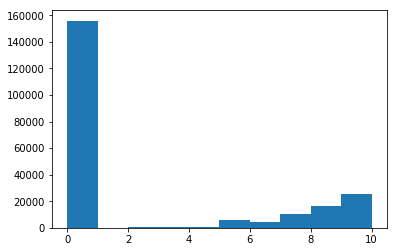

In [8]:
plt.hist(raw['Book-Rating']);

In [30]:
df = raw.copy()
df.columns = ['user','book','rating']
df.head()

,user,book,rating
0,277195,0060391626,10
1,277195,0060502258,0
2,277195,0060987561,0
3,277195,0316666343,0
4,277195,0316734837,0


In [10]:
def rating_scale(num):
    if num >= 9:
        return 5.
    elif num == 8:
        return 4.
    elif num == 7:
        return 3.
    elif num == 6:
        return 2.
    elif num == 0:
        return
    else:
        return 1.

In [31]:
df.rating = df.rating.apply(lambda x: rating_scale(x))

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


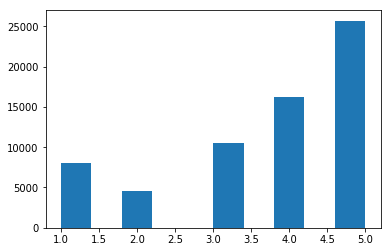

In [12]:
plt.hist(df['rating']);

In [13]:
books = legend(df,'book')

In [14]:
books_legend = create_legend(df,'book')
print(books_legend.head())

           id
0  0006493580
1  000649840X
2  0006512135
3  0006513204
4  0006514855


In [26]:
# books_legend.to_pickle('data/books_legend2.pkl')

In [32]:
df.book = df.book.apply(lambda x: to_int(books,x))

In [33]:
df.head()

,user,book,rating
0,277195,105,5.0
1,277195,111,NaN
2,277195,227,NaN
3,277195,896,NaN
4,277195,909,NaN


In [17]:
test = df[df.rating.isna()]
train = df[df.rating.notna()]

In [32]:
train.head()

,user,book,rating
0,277195,105,5.0
5,277195,953,5.0
24,277195,3958,5.0
27,277195,4091,5.0
28,277195,4105,5.0


In [36]:
test.index = test.user
train.index = train.user

In [37]:
test.drop('user',axis=1,inplace=True)
test.to_csv('data/cleantest.csv',header=False)

train.drop('user',axis=1,inplace=True)
train.to_csv('data/cleantrain.csv',header=False)

# Modeling Using Surprise Library

In [2]:
df = pd.read_csv('data/cleanbooks.csv',names=['user','book','rating'])
df.head()

,user,book,rating
0,1524364,0,4.0
1,710877,0,1.0
2,383045,1,4.0
3,1724123,2,4.0
4,1336653,2,5.0


In [18]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise.model_selection import train_test_split
from surprise.model_selection import KFold

In [19]:
# Load the movielens-100k dataset (download it if needed).
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(train, reader)
testset = Dataset.load_from_df(test, reader)
# Use the famous SVD algorithm.
model = SVD(verbose=1)

# # Run 5-fold cross-validation and print results.
# cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True,n_jobs=-1)

In [54]:
# trainset, testset = train_test_split(data, test_size=.05)

In [20]:
model.fit(data.build_full_trainset())

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19


In [21]:
book_test=[]
for row in test.itertuples(index=False, name=None):
    book_test.append(row)

In [22]:
predictions = model.test(book_test)

In [56]:
# accuracy.rmse(predictions)

RMSE: 1.2005


1.2004713057285994

In [42]:
df.rating.mean()

3.719803349208788

In [23]:
svd = pd.DataFrame(predictions)

In [24]:
svd.drop('details',axis=1,inplace=True)

In [25]:
svd.columns = ['user','book','rating','prediction']

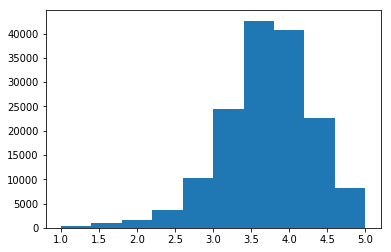

In [26]:
plt.hist(svd.prediction);

In [27]:
svd.head()

,user,book,rating,prediction
0,277195,111,NaN,4.324692
1,277195,227,NaN,4.867013
2,277195,896,NaN,5.000000
3,277195,909,NaN,4.409636
4,277195,1186,NaN,4.395446


In [39]:
# results.to_pickle('SVDresults2.pkl')
svd = pd.read_pickle('SVDresults2.pkl')
als = pd.read_pickle('ALSresults2.pkl')

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


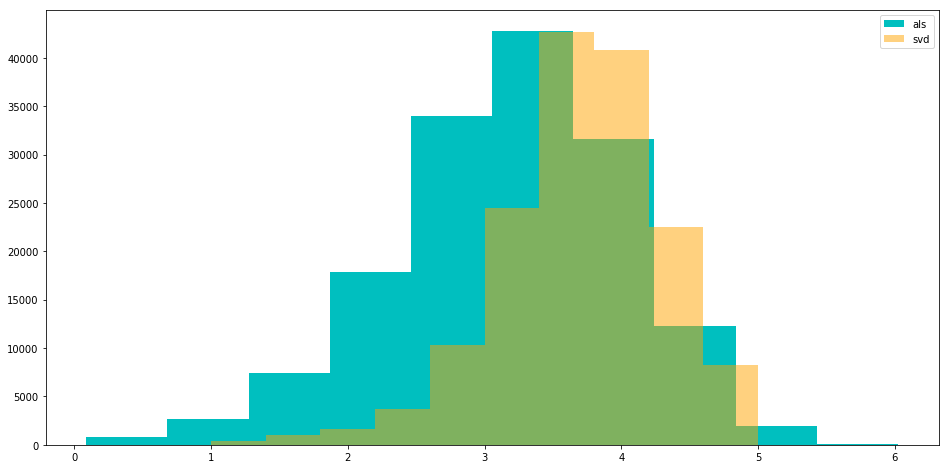

In [41]:
fig = plt.figure(figsize=(16,8))
plt.hist(als.prediction,color='c',label='als');
plt.hist(svd.prediction,color='orange',alpha=.5,label='svd');
plt.legend()

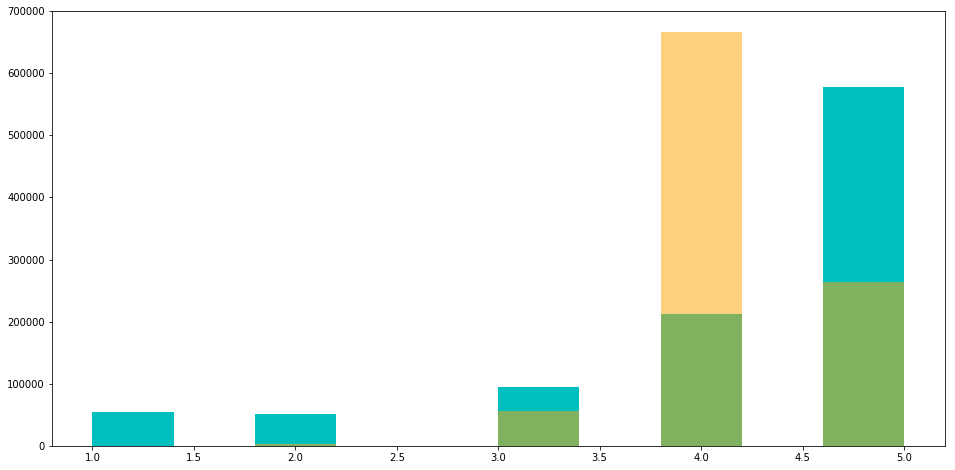

In [13]:
fig = plt.figure(figsize=(16,8))
plt.hist(results.rating,color='c');
plt.hist(round(results.prediction),color='orange',alpha=.5);

In [40]:
# results.to_pickle('SVDresults.pkl')

In [44]:
print('actual mean:',df.rating.mean())
print('SVD prediction mean: ',svd.prediction.mean())
print('ALS prediction mean: ',als.prediction.mean())

actual mean: 3.719803349208788
SVD prediction mean:  3.704866609218941
ALS prediction mean:  3.1763594150543213


# Import the reviews metadata